In [5]:
from __future__ import division
import pandas as pd
import numpy as np
import scipy as sp
import scipy.sparse as ss
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
import pylab as pl
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import Binarizer

In [6]:
# Dataset imported from R using write.csv(USArrests, "/tmp/USArrests.csv", row.names=FALSE)
# Each row in this dataset corresponds to one of the 50 US states.
X_df = pd.read_table("SalesEval.txt", delim_whitespace=True, index_col='PERSON')
X_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 1 to 50
Data columns (total 7 columns):
X1    50 non-null float64
X2    50 non-null float64
X3    50 non-null float64
X4    50 non-null int64
X5    50 non-null int64
X6    50 non-null int64
X7    50 non-null int64
dtypes: float64(3), int64(4)
memory usage: 3.1 KB


In [33]:
X_df.head()

,X1,X2,X3,X4,X5,X6,X7
PERSON,,,,,,,
1,93.0,96.0,97.8,9,12,9,20
2,88.8,91.8,96.8,7,10,10,15
3,95.0,100.3,99.0,8,12,9,26
4,101.3,103.8,106.8,13,14,12,29
5,102.0,107.8,103.0,10,15,12,32


In [34]:
X_df.describe()

,X1,X2,X3,X4,X5,X6,X7
count,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000
mean,98.836000,106.622000,102.810000,11.220000,14.18000,10.560000,29.760000
std,7.337345,10.124315,4.712218,3.950149,3.38478,2.139617,10.537707
min,81.500000,87.300000,94.300000,1.000000,5.00000,5.000000,9.000000
25%,93.550000,99.500000,99.075000,8.250000,12.00000,9.000000,21.500000
50%,100.650000,106.250000,103.150000,10.000000,15.00000,11.000000,31.500000
75%,105.050000,114.750000,106.450000,14.000000,17.00000,12.000000,37.000000
max,110.800000,122.300000,115.300000,18.000000,20.00000,15.000000,51.000000


In [7]:
Z_df = pd.DataFrame(scale(X_df),index = X_df.index, columns = X_df.columns)

/Users/leannedong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


In [39]:
Z_df.describe()

,X1,X2,X3,X4,X5,X6,X7
count,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01
mean,-4.440892e-17,1.310063e-15,-8.615331e-16,-1.826317e-16,4.884981e-17,-2.359224e-16,-1.487699e-16
std,1.010153e+00,1.010153e+00,1.010153e+00,1.010153e+00,1.010153e+00,1.010153e+00,1.010153e+00
min,-2.386695e+00,-1.927851e+00,-1.824278e+00,-2.613512e+00,-2.739676e+00,-2.624979e+00,-1.990069e+00
25%,-7.277382e-01,-7.105969e-01,-8.006675e-01,-7.595039e-01,-6.505985e-01,-7.365048e-01,-7.918098e-01
50%,2.497384e-01,-3.711626e-02,7.288539e-02,-3.119848e-01,2.447205e-01,2.077321e-01,1.667977e-01
75%,8.554985e-01,8.109704e-01,7.803024e-01,7.109161e-01,8.415998e-01,6.798506e-01,6.940319e-01
max,1.647117e+00,1.564271e+00,2.677466e+00,1.733817e+00,1.736919e+00,2.096206e+00,2.036082e+00


The variances are now comparable.

## Principal components

In [8]:
# The loading vectors
pca_loadings = pd.DataFrame(PCA().fit(Z_df).components_.T, index=Z_df.columns, columns=['V1','V2','V3','V4','V5','V6','V7'])
pca_loadings

,V1,V2,V3,V4,V5,V6,V7
X1,0.433672,-0.111754,-0.075489,0.042373,0.632494,-0.336596,-0.527825
X2,0.420214,0.029287,-0.442479,-0.010753,-0.000118,0.785342,-0.099483
X3,0.421051,0.009202,0.204189,0.324928,-0.701026,-0.156811,-0.399164
X4,0.294286,0.668416,0.451492,0.302712,0.261008,0.114171,0.299960
X5,0.349092,0.294944,0.005922,-0.846604,-0.174263,-0.196909,0.072311
X6,0.289167,-0.642378,0.603780,-0.153674,0.086959,0.236261,0.228444
X7,0.407404,-0.200368,-0.434040,0.246013,-0.049583,-0.371111,0.636224


In [9]:
# Fit the PCA model and transform Z_df to get the principal components
pca = PCA()
df_plot = pd.DataFrame(pca.fit_transform(Z_df), columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7'],index = Z_df.index)
df_plot

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
PERSON,,,,,,,
1,-2.234315,0.138090,0.011530,-0.109661,0.192379,-0.156962,-0.022621
2,-3.169056,-0.536686,0.455472,-0.039280,0.012324,0.090737,0.016171
3,-1.667241,-0.163924,-0.511669,0.045066,0.090884,-0.195689,-0.024092
4,0.671046,-0.171996,0.920927,0.356195,-0.194117,-0.219226,-0.250848
5,0.533134,-0.660965,0.101297,-0.322844,0.171341,-0.063575,-0.041834
6,-1.273143,-0.176435,0.629362,-0.539885,0.250849,-0.120424,0.027232
7,-1.634727,0.016184,-0.324481,0.102669,0.205932,-0.216774,-0.036767
8,5.038653,-0.197814,0.918456,0.156417,-0.604176,-0.173713,0.329163
9,0.979902,-0.778259,0.436124,-0.864445,0.062568,-0.058774,-0.083361


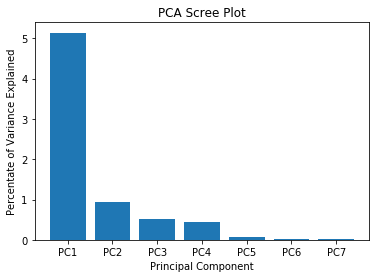

In [10]:
percent_variance = np.round(pca.explained_variance_, decimals =2)
columns = ['PC1', 'PC2', 'PC3', 'PC4','PC5','PC6','PC7']
plt.bar(x= range(1,8), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

/Users/leannedong/anaconda3/lib/python3.6/site-packages/matplotlib/legend.py:1196: MatplotlibDeprecationWarning: 
Legend.draggable() is drepecated in favor of Legend.set_draggable(). Legend.draggable may be reintroduced as a property in future releases.
  message="Legend.draggable() is drepecated in "


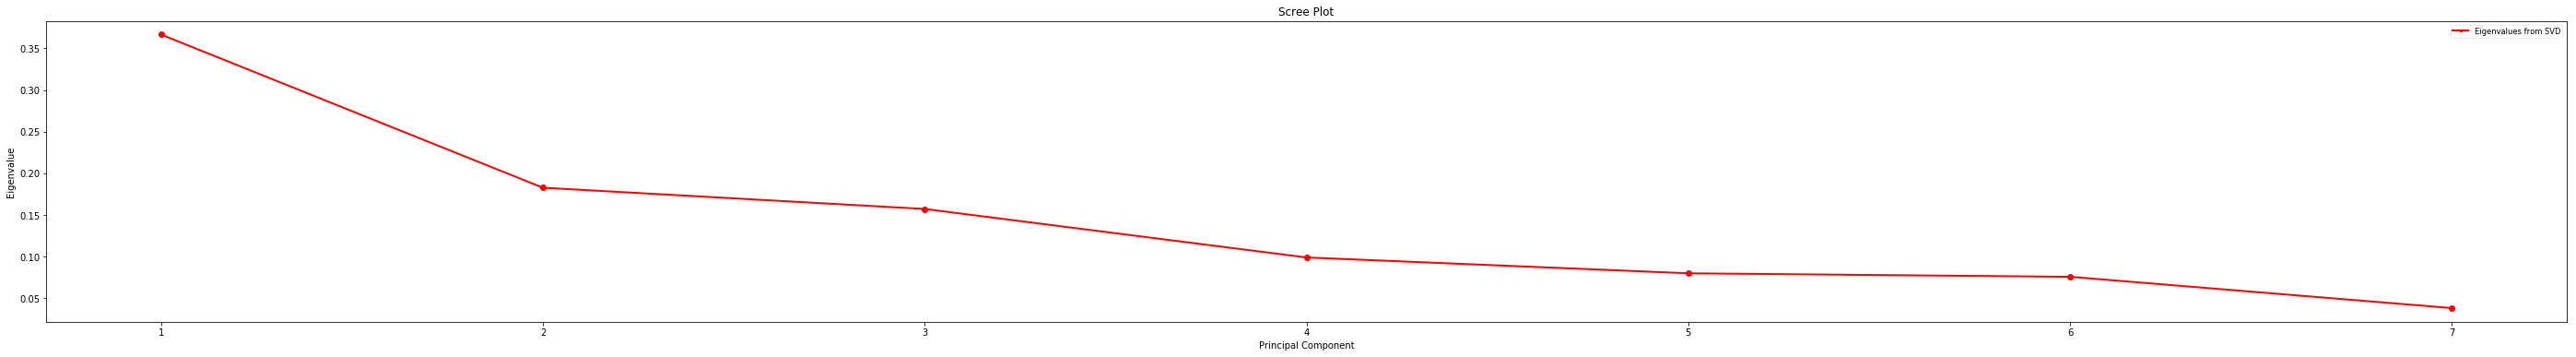

In [46]:
# alternative way to make a screenplot

num_vars = 7
num_obs = 50
A = np.random.randn(num_obs,num_vars)
A = np.asmatrix(A.T) * np.asmatrix(A)
U, S, V = np.linalg.svd(A) 
eigvals = S**2 / np.sum(S**2)  # NOTE (@amoeba): These are not PCA eigenvalues. 
                               # This question is about SVD.

fig = plt.figure(figsize=(49,6))
sing_vals = np.arange(num_vars) + 1
plt.plot(sing_vals, eigvals, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
#I don't like the default legend so I typically make mine like below, e.g.
#with smaller fonts and a bit transparent so I do not cover up data, and make
#it moveable by the viewer in case upper-right is a bad place for it 
leg = plt.legend(['Eigenvalues from SVD'], loc='best', borderpad=0.3, 
                 shadow=False, prop=matplotlib.font_manager.FontProperties(size='small'),
                 markerscale=0.4)
leg.get_frame().set_alpha(0.4)
leg.draggable(state=True)
plt.show()

In [53]:
R = X_df.corr().round(2)
R

,X1,X2,X3,X4,X5,X6,X7
X1,1.00,0.93,0.88,0.57,0.71,0.67,0.93
X2,0.93,1.00,0.84,0.54,0.75,0.47,0.94
X3,0.88,0.84,1.00,0.70,0.64,0.64,0.85
X4,0.57,0.54,0.70,1.00,0.59,0.15,0.41
X5,0.71,0.75,0.64,0.59,1.00,0.39,0.57
X6,0.67,0.47,0.64,0.15,0.39,1.00,0.57
X7,0.93,0.94,0.85,0.41,0.57,0.57,1.00


In [55]:
from numpy import *

In [58]:
A = R
λ, U = linalg.eig(A)
print('Eigenvalues:')
print(λ)
print('\nEigenvectors:')
print(U)

Eigenvalues:
[5.03369492 0.93086795 0.49702703 0.42188187 0.08358172 0.01140019
 0.02154631]

Eigenvectors:
[[ 0.43372877  0.10968442 -0.09065827  0.04322375  0.61086385  0.5597854
   0.32132093]
 [ 0.42051884 -0.02529418 -0.43844761 -0.02082393  0.00397698  0.05965067
  -0.79137864]
 [ 0.42042355 -0.01405288  0.20790425  0.32348579 -0.7119975   0.39033742
   0.12599835]
 [ 0.29384017 -0.67241834  0.44371618  0.30428248  0.2764736  -0.29360338
  -0.09694874]
 [ 0.34974748 -0.29420833  0.00463071 -0.8434466  -0.17459811 -0.07646556
   0.20823802]
 [ 0.28998204  0.63626498  0.61401061 -0.15354743  0.10502078 -0.22696992
  -0.21896744]
 [ 0.40685669  0.20879166 -0.42709025  0.25590665 -0.04401807 -0.62221663
   0.39228593]]


In [81]:
a1=U[:,0]
a1

array([0.43372877, 0.42051884, 0.42042355, 0.29384017, 0.34974748,
       0.28998204, 0.40685669])

In [114]:
a11 = np.array([a1])

In [115]:
shape(a1)

(7,)

In [116]:
shape(a11)

(1, 7)

In [120]:
shape(a11.T)

(7, 1)

In [82]:
λ1=λ[0]
λ1

5.033694921560165

In [112]:
a2 = U[:,1]
a2
a22=np.array([a2])
shape(a2)

(7,)

In [113]:
shape(a22)

(1, 7)

In [85]:
λ2=λ[1]
λ2

0.9308679500381011

In [103]:
shape(a1)

(7,)

In [108]:
shape(np.array([a1]).transpose())

(7, 1)

In [121]:
## rank 1 approximation
R1 = λ1*a11.T@a11

In [124]:
R1

array([[0.94694195, 0.91810125, 0.91789321, 0.641529  , 0.7635891 ,
        0.63310569, 0.88827326],
       [0.91810125, 0.89013894, 0.88993724, 0.62199017, 0.74033271,
        0.6138234 , 0.86121941],
       [0.91789321, 0.88993724, 0.88973559, 0.62184923, 0.74016496,
        0.61368431, 0.86102427],
       [0.641529  , 0.62199017, 0.62184923, 0.43461953, 0.51731213,
        0.42891295, 0.60178247],
       [0.7635891 , 0.74033271, 0.74016496, 0.51731213, 0.61573818,
        0.51051979, 0.71628021],
       [0.63310569, 0.6138234 , 0.61368431, 0.42891295, 0.51051979,
        0.42328129, 0.59388102],
       [0.88827326, 0.86121941, 0.86102427, 0.60178247, 0.71628021,
        0.59388102, 0.83323945]])

In [125]:
shape(R1)

(7, 7)

In [127]:
R2 = R1 + λ2*a22.T@a22
R2

array([[0.95814091, 0.91551867, 0.91645839, 0.57287394, 0.73354992,
        0.69806943, 0.90959124],
       [0.91551867, 0.8907345 , 0.89026812, 0.63782262, 0.74726001,
        0.59884219, 0.8563033 ],
       [0.91645839, 0.89026812, 0.88991942, 0.63064539, 0.74401361,
        0.60536109, 0.85829299],
       [0.57287394, 0.63782262, 0.63064539, 0.85550815, 0.70146674,
        0.0306539 , 0.47109294],
       [0.73354992, 0.74726001, 0.74401361, 0.70146674, 0.69631275,
        0.33626647, 0.65909863],
       [0.69806943, 0.59884219, 0.60536109, 0.0306539 , 0.33626647,
        0.80012748, 0.71754387],
       [0.90959124, 0.8563033 , 0.85829299, 0.47109294, 0.65909863,
        0.71754387, 0.87381966]])

In [128]:
shape(R2)

(7, 7)

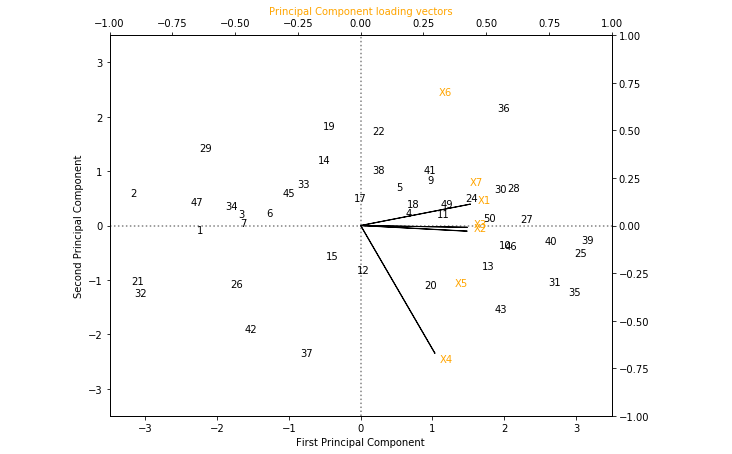

In [11]:
fig , ax1 = plt.subplots(figsize=(9,7))

ax1.set_xlim(-3.5,3.5)
ax1.set_ylim(-3.5,3.5)

# Plot Principal Components 1 and 2
for i in df_plot.index:
    ax1.annotate(i, (df_plot.PC1.loc[i], -df_plot.PC2.loc[i]), ha='center')

# Plot reference lines
ax1.hlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.vlines(0,-3.5,3.5, linestyles='dotted', colors='grey')

ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
    
# Plot Principal Component loading vectors, using a second y-axis.
ax2 = ax1.twinx().twiny() 

ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.tick_params(axis='y', colors='orange')
ax2.set_xlabel('Principal Component loading vectors', color='orange')

# Plot labels for vectors. Variable 'a' is a small offset parameter to separate arrow tip and text.
a = 1.07  
for i in pca_loadings[['V1', 'V2']].index:
    ax2.annotate(i, (pca_loadings.V1.loc[i]*a, -pca_loadings.V2.loc[i]*a), color='orange')

# Plot vectors
ax2.arrow(0,0,pca_loadings.V1[0], -pca_loadings.V2[0])
ax2.arrow(0,0,pca_loadings.V1[1], -pca_loadings.V2[1])
ax2.arrow(0,0,pca_loadings.V1[2], -pca_loadings.V2[2])
ax2.arrow(0,0,pca_loadings.V1[3], -pca_loadings.V2[3]);